In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
from PyComplexHeatmap import *

In [2]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

## Generate dataset

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

## Add selected rows labels

Estimated legend width: 16.258333333333333 mm


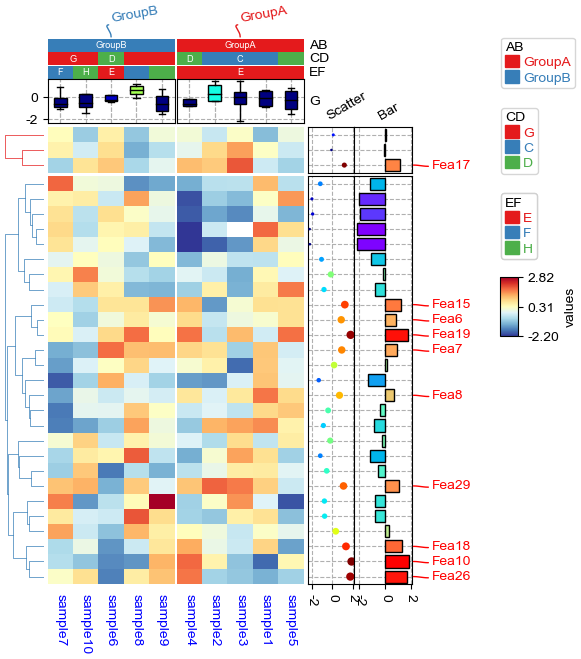

In [4]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
                           Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=12,cmap='jet',legend=False),
                           Bar=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=15,cmap='rainbow',legend=False),
                           selected=anno_label(df_rows,colors='red',relpos=(-0.05,0.4)),
                           label_kws={'rotation':30,'horizontalalignment':'left','verticalalignment':'bottom'},
                            axis=0,verbose=0)

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=10),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':True}),
                           G=anno_boxplot(df_box, cmap='jet',legend=False),
                           verbose=0)

plt.figure(figsize=(5.5, 6.5))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_cluster=True,row_cluster=True,
                       col_split=df.AB,row_split=2, 
                       col_split_gap=0.5,row_split_gap=0.8,
                       label='values',row_dendrogram=True,
                       show_rownames=False,show_colnames=True,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

## Add float annotations on the top of heatmap cells

              AB CD EF         F
sample1   GroupA  C  E -1.107985
sample2   GroupA  C  E  1.826047
sample3   GroupA  C  E -1.307309
sample4   GroupA  D  E  0.549417
sample5   GroupA  D  E  0.661883
sample6   GroupB  D  E  1.679506
sample7   GroupB  G  F -0.022440
sample8   GroupB  G  F  0.263968
sample9   GroupB  G  H  0.488317
sample10  GroupB  G  H -0.874287
sample1    -0.173657
sample2     0.374323
sample3    -0.216292
sample4    -0.343647
sample5    -0.321000
sample6     0.064604
sample7    -0.390628
sample8     0.550578
sample9    -0.537598
sample10   -0.077404
dtype: float64
        sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1   1.189743 -0.563483 -0.542819 -1.173955 -0.558952  0.028580  1.868090   
Fea2   1.855515 -0.391425       NaN -2.203254  0.815831  0.476531  0.864510   
Fea3   0.765706 -0.892111  0.552974 -0.753072 -0.983040 -0.374897  0.653828   
Fea4  -0.194770  0.240715  1.522625 -0.773715 -1.953098 -0.549611  1.676346   
Fea5   0.637811 -

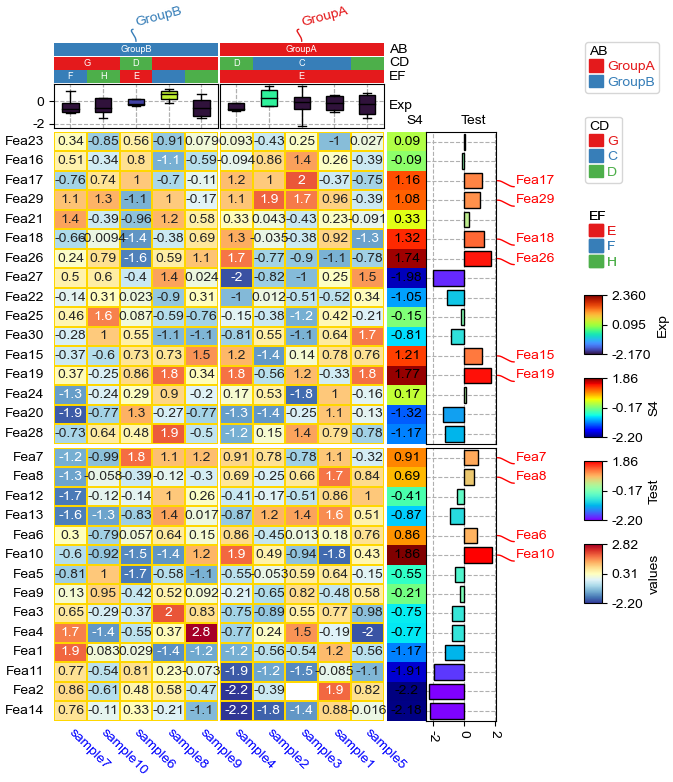

[['Fea23', 'Fea16', 'Fea17', 'Fea29', 'Fea21', 'Fea18', 'Fea26', 'Fea27', 'Fea22', 'Fea25', 'Fea30', 'Fea15', 'Fea19', 'Fea24', 'Fea20', 'Fea28'], ['Fea7', 'Fea8', 'Fea12', 'Fea13', 'Fea6', 'Fea10', 'Fea5', 'Fea9', 'Fea3', 'Fea4', 'Fea1', 'Fea11', 'Fea2', 'Fea14']]
[['sample7', 'sample10', 'sample6', 'sample8', 'sample9'], ['sample4', 'sample2', 'sample3', 'sample1', 'sample5']]


In [5]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                           add_text=True,height=10,
                                           text_kws={'rotation':0,'fontsize':10,'color':'black'}),
                           # Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                           #                  height=10),
                           Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=18,cmap='rainbow'),
                           selected=anno_label(df_rows,colors='red'),
                           axis=0,verbose=0,label_kws={'rotation':0,'horizontalalignment':'left','verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           verbose=0) #verbose=0 will turn off the log.

print(df)
print(df_box.mean(axis=1))
print(df_heatmap)
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_split=df.AB,
                       row_split=df_rows.XY, col_split_gap=0.5,row_split_gap=1,
                       col_cluster=True,row_cluster=True,
                       label='values',row_dendrogram=False,show_rownames=True,show_colnames=True,
                         tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
                       annot=True,linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                      xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()
print(cm.row_order)
print(cm.col_order)

## Only plot the annotations

In [6]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
print(df)
print(df_box)
print(df_scatter)
print(df_bar)
print(df_bar1)
print(df_bar2)
print(df_bar3)
print(df_bar4)

              AB CD         F
sample1    AAAA1  C -2.189449
sample2    AAAA1  C  1.597308
sample3    AAAA1  C -0.902915
sample4    AAAA1  D  1.688942
sample5    AAAA1  D -0.601576
sample6   BBBBB2  D  0.138003
sample7   BBBBB2  G -1.678810
sample8   BBBBB2  G  0.358534
sample9   BBBBB2  G  0.910123
sample10  BBBBB2  G  0.881547
             Gene1     Gene2     Gene3     Gene4
sample1  -0.770512 -0.576257  0.633139  0.702249
sample2   0.877298  0.773484  0.179830 -0.493709
sample3   0.789285  1.715954  1.029709  0.497304
sample4  -0.184022 -1.126313 -0.238925  1.047216
sample5   1.307202 -1.171692 -0.380329  1.534007
sample6  -1.189522 -0.226746 -2.020137 -0.553522
sample7   0.941781  0.266867 -0.744761 -2.124666
sample8   1.106547 -0.265439  0.593110 -0.338993
sample9   0.188318 -1.555040  1.912654 -0.353997
sample10  1.170057 -0.589321  0.165045 -1.140613
           Scatter
sample1   6.194335
sample2   9.124686
sample3   9.082718
sample4   6.514319
sample5   2.869762
sample6   0.71728

Starting plotting HeatmapAnnotations


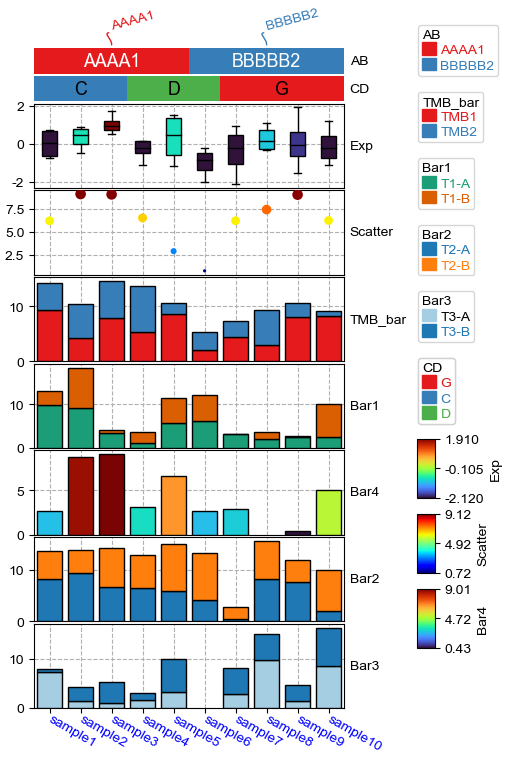

In [7]:
plt.figure(figsize=(4, 8))
col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## Change orentation `down` and add extra space

Starting plotting HeatmapAnnotations


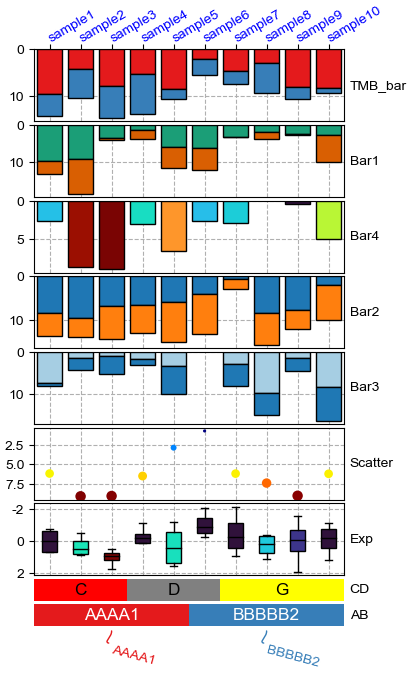

In [8]:
plt.figure(figsize=(4, 8))
row_ha = HeatmapAnnotation(
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                            Scatter=anno_scatterplot(df_scatter), 
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                                           add_text=True,legend=True,text_kws={'color':'black'}),
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            label=anno_label(df.AB, merge=True,rotation=-15),
                           plot=True,plot_legend=False,legend_hpad=13,axis=1,hgap=1
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=30)
plt.show()
# Here, we can use hgap (when axis=1) or wgap (when axis=0) to control the widh of height space between different annotations.

## Change orentation to the left

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


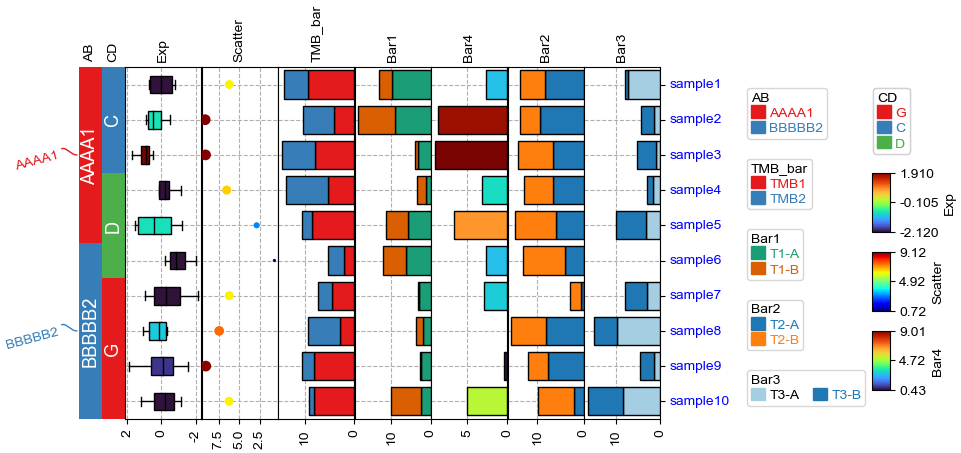

In [9]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,legend_gap=5,
                           axis=0,legend_hpad=20
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=0)
plt.show()

## Change orentation to the right

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


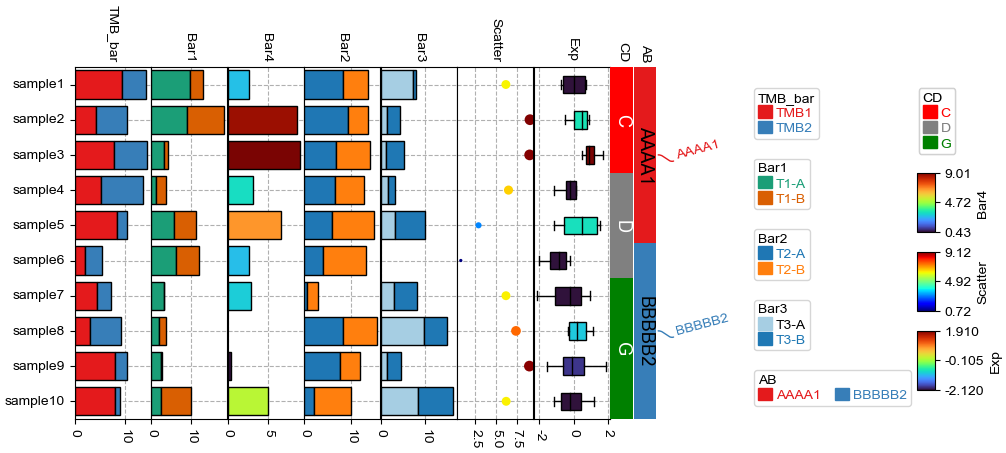

In [10]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                            Scatter=anno_scatterplot(df_scatter), 
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'green'},
                                           add_text=True,legend=True,text_kws={'rotation':-90}),
                            AB=anno_simple(df.AB,add_text=True,legend=True,text_kws={'rotation':-90,'color':'black'}),
                            label=anno_label(df.AB, merge=True,rotation=15),
                           plot=True,legend=True,legend_hpad=13,legend_gap=5,axis=0
                            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'black'},rotation=0)
plt.show()

## Changing orientation using parameter `orientation` 
By Default, if there is no `anno_label` in the annotation, the oriention would be determined by parameter `orientation`.

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


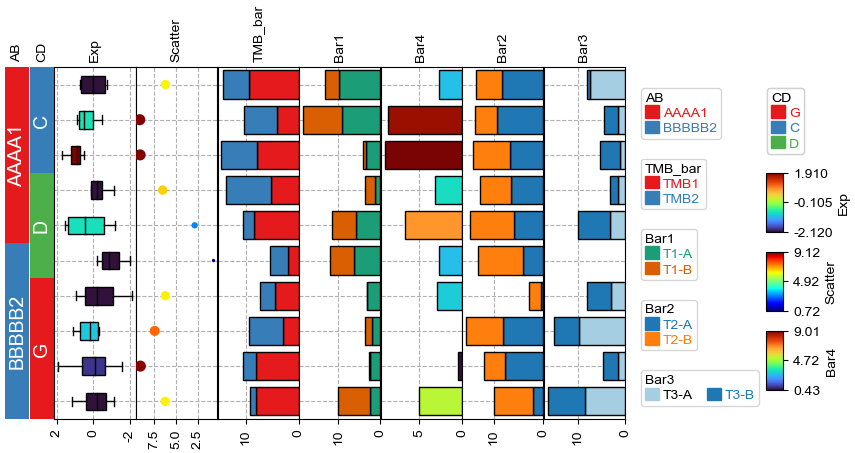

In [11]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
                            AB=anno_simple(df.AB,add_text=True,legend=True),
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,axis=0,
                            legend_gap=5,orientation='left',
                            )
plt.show()

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


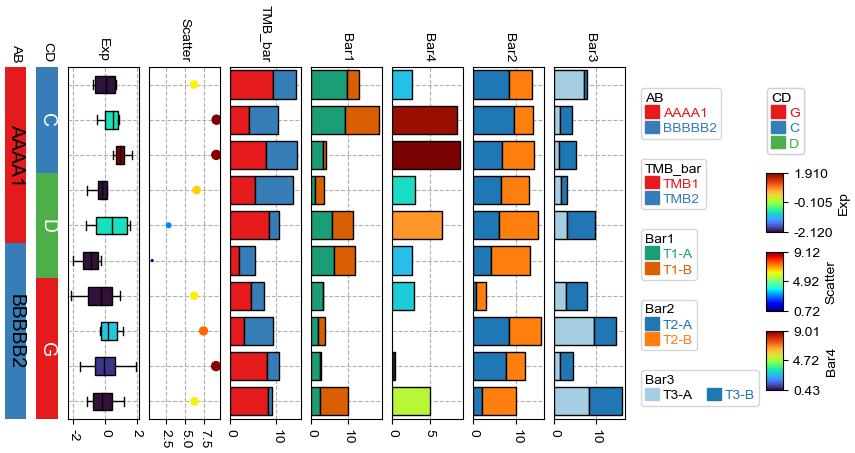

In [12]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
                            AB=anno_simple(df.AB,add_text=True,legend=True,
                                          text_kws={'rotation':-90,'fontsize':14,'color':'black'}),
                            CD=anno_simple(df.CD,add_text=True,legend=True,
                                          text_kws={'rotation':-90,'fontsize':14,'color':'white'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), 
                           TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
                           Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
                           Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
                           plot=True,legend=True,axis=0,wgap=3,
                            legend_gap=5,orientation='right',
                            )
plt.show()

## Add multiple heatmap annotations using `for` loop
Typically, we can create a heatmap annotatin using the following code:<br>

```python

col_ha = HeatmapAnnotation(
                        Group=anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                        CellType=anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend),
                        M1=anno_simple(df_cols['M1'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M1'}),
                        verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})
```
<br>
But what if we have many annotations, for example:<br>

```python

col_ha = HeatmapAnnotation(
                        Group=anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                        CellType=anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend),
                        M1=anno_simple(df_cols['M1'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M1'}),
                        M2=anno_simple(df_cols['M2'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M2'}),
                        M3=anno_simple(df_cols['M3'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M3'}),
                        .....
                        verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})
```

<br>

In this case, we can create an dict including the name and annotation as keys and values:<br>

```python
col_ha_dict={
                'Group':anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                'CellType':anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend)
                }


for col in sample_cols:
    col_ha_dict[col]=anno_simple(df_cols[col],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':col})
    
col_ha = HeatmapAnnotation(**col_ha_dict,
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

```